
# <span style="color:rgb(106,127,16)">Overview of some tools applied to COVID-19 data</span>


<div style="text-align: right"><span style="color:rgb(106,127,16)">March 31, 2020 
    </span></div>
<br>


<br>



The purpose of this short overview is to give you a sense of the utility of some of the tools you will study later in this course and also to check that you have (or can install) some modules we shall use later. 

In this demo, without too many lines of code,  we obtain and visualize data on our most pressing current issue: the progression of COVID-19 disease worldwide. The data on COVID-19 (which is changing in as yet unknown ways) will be used on several occasions as this course progresses. 

We will proceed to 
- download today's data on COVID-19 from a cloud repository,
- make a structured array out of the data,
- use a geospatial module to put the data on a world map, 
- download county maps from US Census Bureau, and 
- visualize the COVID-19 data restricted to Oregon.

If you are new to the modules used below,  don't try to digest every element of the code here yet: again, the material here is intended just to give you an overview of the various tools we will learn in depth later.



## The modules you need


We have already seen how to install python modules. Make sure you have the following modules installed before proceeding. (By now, you should know how to install missing modules.)

- `matplotlib` (all sorts of plotting & visualization in python)
- `descartes` (for visualizing map objects within matplotlib)
- `gitpython` (to work in python with Git repositories)
- `pandas` (to make data frame structures out of raw data)
- `geopandas` (for analysis of geospatial data)
- `urllib` (for fetching resources at an internet url)

In [1]:
import pandas as pd
import os
from git import Repo
import matplotlib.pyplot as plt
import geopandas as gpd
import urllib
import shutil
%matplotlib inline

## Get the data 


The Johns Hopkins University Center for Systems Science and Engineering 
has curated data on COVID-19 from multiple sources and provided it online 
at the "GitHub" cloud repository   https://github.com/CSSEGISandData/COVID-19. These days, as the disease progresses, new data is being pushed into this repository every day. 

GitHub provides code and data in an efficient distributed version control system called `git`. We don't need to get into details here on how git does it magic. It suffices to know that git repositories in the cloud, or a remote server, can be *cloned* to 
get an identical local copy on our computers.

Let us  begin by cloning a copy of the Johns Hopkins COVID-19 data repository into a location in your computer. You specify this location in your computer in the variable called `covidfolder` below. Once you have cloned the repository, the next time you run the same line of code, it does not clone it again. Instead, it pulls only the updates from the cloud.

In [2]:
# your local folder into which you want to download the covid data

covidfolder = '../../data_external/covid19'

In [3]:
if os.path.isdir(covidfolder):   # if repo exists, pull newest data 
    repo = Repo(covidfolder)
    repo.remotes.origin.pull()
else:                            # otherwise, clone from remote
    repo = Repo.clone_from('https://github.com/CSSEGISandData/COVID-19.git',
                           covidfolder)   
datadir = repo.working_dir + '/csse_covid_19_data/csse_covid_19_daily_reports'

The folder `datadir` contains many files (all of which can be listed here using the command `os.listdir(datadir)` if needed). The filenames begin with a date like `03-27-2020` and ends in `.csv`. The ending suffix `csv` stands for "comma separated values", a common simple format for storing uncompressed data.

## Examine the data for a specific date


The module `pandas` can make a `DataFrame` object out of each such `.csv` files. Let us pick a recent date, say March 27, 2020,  and examine the data for that date.

In [4]:
c = pd.read_csv(datadir+'/03-27-2020.csv')

The `DataFrame` object `c` has over 3000 rows. An examination of the first five rows already tells us a lot about the data layout:

In [5]:
c.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-03-27 22:14:55,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-03-27 22:14:55,30.295065,-92.414197,8,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-03-27 22:14:55,37.767072,-75.632346,2,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-03-27 22:14:55,43.452658,-116.241552,54,0,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-03-27 22:14:55,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


This object `c` looks like a structured array. Each row corresponds to a location, specified in latitude `Lat` and longitude `Long_`. The columns  "Confirmed", "Deaths", and
"Recovered" represents the number of confirmed cases, deaths, and recovered cases  due to COVID-19 at that location.

## Put the data on a map

Data like that in `c` contains geographical information. One way to visualize geospatial data is to somehow indicate the quantity of interest on a map. We shall visualize the data in the "Confirmed" column by positioning a marker at a geographical location and make the marker size correspond to   the number of confirmed cases at that position. The module `geopandas` (`gpd`) is well-suited for visualizing geospatial data. It is built on top of the `pandas` library. So it is easy to convert our `pandas` object `c` to a `geopandas` object.


In [6]:
geo = gpd.points_from_xy(c['Long_'], c['Lat']) # make a geometry object from Lat, Long
gc = gpd.GeoDataFrame(c, geometry=geo)         # give it to geopandas together with c
gc.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,geometry
0,45001.0,Abbeville,South Carolina,US,2020-03-27 22:14:55,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US",POINT (-82.46171 34.22333)
1,22001.0,Acadia,Louisiana,US,2020-03-27 22:14:55,30.295065,-92.414197,8,1,0,0,"Acadia, Louisiana, US",POINT (-92.41420 30.29506)
2,51001.0,Accomack,Virginia,US,2020-03-27 22:14:55,37.767072,-75.632346,2,0,0,0,"Accomack, Virginia, US",POINT (-75.63235 37.76707)
3,16001.0,Ada,Idaho,US,2020-03-27 22:14:55,43.452658,-116.241552,54,0,0,0,"Ada, Idaho, US",POINT (-116.24155 43.45266)
4,19001.0,Adair,Iowa,US,2020-03-27 22:14:55,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US",POINT (-94.47106 41.33076)


The only difference between `gc` and `c` is the last column, which contains the new geometry objects representing points on the globe. Next, we place markers at these points on a map of the world. Here is how we get a simple map:  

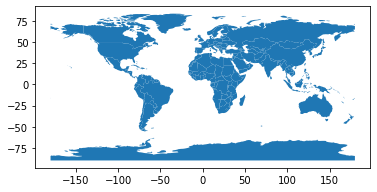

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot();

On top of such a map, we can now put the markers whose size  is proportional to the number of confirmed cases. 

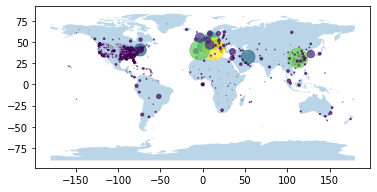

In [8]:
base = world.plot(alpha=0.3)
msz = 500 * gc['Confirmed'] / gc['Confirmed'].max()
gc.plot(ax=base, column='Confirmed', markersize=msz, alpha=0.7); 

## Restricting to Oregon

Restricting the COVID-19 data in `c` to Oregon is very easy:

In [9]:
co = c[c['Province_State']=='Oregon']

However, to visualize this, we need a map of Oregon. 


Unfortunately, `geopandas` does not appear to carry  any 
information about Oregon and its counties.
However this information is available from the [United States Census Bureau](https://www.census.gov/).  (By the way, the 2020 census is happening now! Do not forget to respond to their survey. They are one of our authoritative sources of quality data.) 

To extract the COVID-19 information for Oregon and visualize it on a map of Oregon, we need to get the county boundary information from the census bureau.  This situation illustrates a common situation that arises when trying to analyze data: it is often necessary to procure and merge data from  multiple sources in order to 
 understand a data set.
 
 
A quick google search reveals the census page with county information. The information is now in an  online file `cb_2018_us_county_500k.zip`, not in a git repository as before. 
Let us download this file, without leaving this notebook using python's `urllib` module.

In [10]:
# url of the data
census_url = 'https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_county_500k.zip'

# location of your download
your_download_folder = '../../data_external'
if not os.path.isdir(your_download_folder):
    os.mkdir(your_download_folder)
us_county_file = your_download_folder + '/cb_2018_us_county_500k.zip'

# download if the file doesn't already exist 
if not os.path.isfile(us_county_file):
    with urllib.request.urlopen(census_url) as response, open(us_county_file, 'wb') as out_file:
        shutil.copyfileobj(response, out_file)

Now, your local computer has a zip file,  which has among its contents, files with geometry information on the county boundaries, which can be read by `geopandas`.
We let `geopandas` directly read in the zip file (as suggested in [[DN]](http://blog.danwin.com/census-places-cartodb-geopandas-mapping/)) as it seems to know which information to extract from the zip archive to make a data frame with geometry. 

In [11]:
us_counties = gpd.read_file(f"zip://{us_county_file}")
us_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."


The object `us_counties`  has information about all the counties. Now, we need to restrict this data to just that of Oregon.  Looking at the columns, we find something called STATEFP.  Searching through the [government pages](https://www.census.gov/programs-surveys/geography/technical-documentation/records-layout/nlt-record-layouts.html), we find that  STATEFP refers to a 2-character state FIPS code. 
The FIPS code refers to [Federal Information Processing Standard](https://en.wikipedia.org/wiki/FIPS_county_code)
which was a "standard" at one time, then deemed obsolete, but still continues to be used today. Anyway, suffices to say that it is easy to find that Oregon's FIPS code is 41. Once we know this, python makes it is easy to restrict the data to Oregon: 

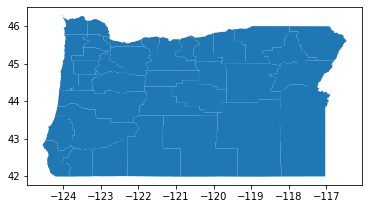

In [12]:
ore = us_counties[us_counties['STATEFP']=='41']
ore.plot();

Now we have the Oregon  data in two data frames, `ore` and `co`. We must merge them -- a situation so often encountered when dealing with real data that there is a facility for it in `pandas` called `merge`. Both data has FIPS codes: in `ore` you find it under column GEOID, and in `co` you find it called `FIPS`. The merged data frame is `orco` below:

In [13]:
ore = ore.astype({'GEOID': 'int64'}).rename(columns={'GEOID' : 'FIPS'})
co = co.astype({'FIPS': 'int64'})
orco = pd.merge(ore, co.iloc[:,:-1], on='FIPS')

The `orco` object now has both the geometry information as well as the COVID-19 information, making it extremely easy to visualize.

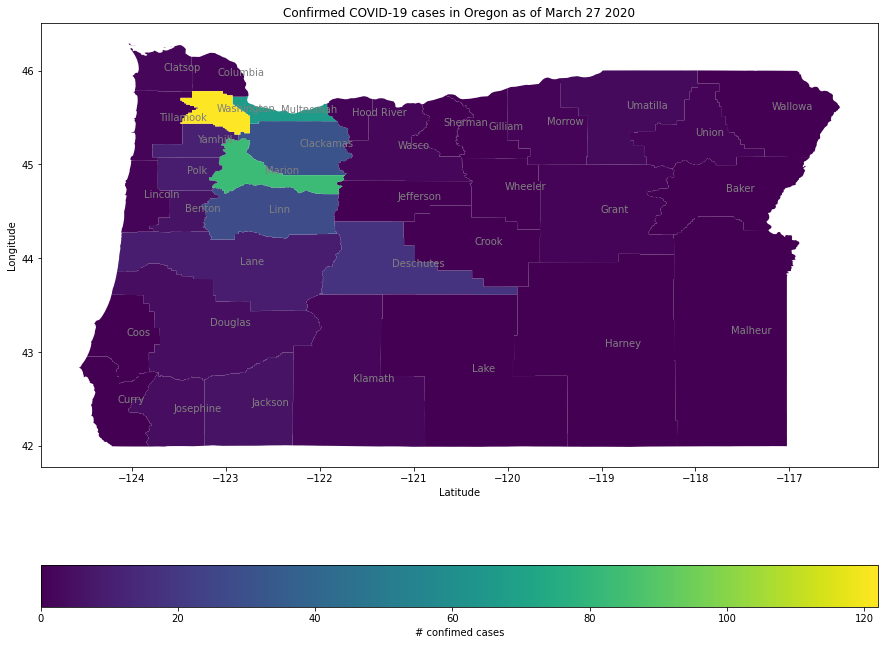

In [18]:
# plot coloring counties by number of confirmed cases

fig, ax = plt.subplots(figsize=(15, 12))
orco.plot(ax=ax, column='Confirmed', legend=True, 
          legend_kwds={'label': '# confimed cases', 'orientation':'horizontal'})

# label the counties 

for x, y, county in zip(orco['Long_'], orco['Lat'], orco['NAME']):
    ax.text(x, y, county, color='grey')
    
ax.set_title('Confirmed COVID-19 cases in Oregon as of March 27 2020'); ax.set_xlabel('Latitude'); ax.set_ylabel('Longitude');

This is an example of a [chloropleth map](https://en.wikipedia.org/wiki/Choropleth_map),   a map where regions are colored or shaded in proportion to some data variable. It is an often-used data visualization tool. 

## Many more things you can do 

Different ways of displaying data often give different insights. You might have specific  queries whose answers already lie in the data we have downloaded. Let me show you answers I extracted to two questions I had. How I produced these answers should be treated as an assignment once we have covered the `pandas` module.

1. *Question:* How does Oregon compare currently with the other two west coast states? 
   
   *Answer:*
    <img src="../figs/westcoast-2020-03-30.png">

2.  *Question:* How does the progression of infections in New York compare with Hubei where the disease started? 
    
    *Answer:*
    <img src="../figs/newyork-hubei-2020-03-30.png">


Of course, the COVID-19 situation is evolving, so these figures,  created for delivery in our March 31 class, is immediately outdated. This situation is evolving in as yet unknown ways.  I am sure that  you, like me,  want to know more about how these plots will change in the next few months.   As the course proceeds and you amass more technical skills, I encourage you to answer your own questions on COVID-19 by returning to this overview, pulling the most recent data, and modifying the code above to your needs. 

 
<hr>




<span style="color:rgb(106,127,16); font-size:8pt">These materials were created by</span> [<span style="color:rgb(106,127,16); font-size:8pt">Jay Gopalakrishnan</span>](http://web.pdx.edu/~gjay/) <span style="color:rgb(106,127,16); font-size:8pt">for a sophomore course (MTH 271) offered during the Spring 2020 quarter at Portland State University, and are made available under the</span> [<span style="color:rgb(106,127,16) ; font-size:8pt">CC-BY-SA license</span>](https://creativecommons.org/licenses/by-sa/4.0/legalcode).
 